In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_path = "data/city_data.csv"
ride_path = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

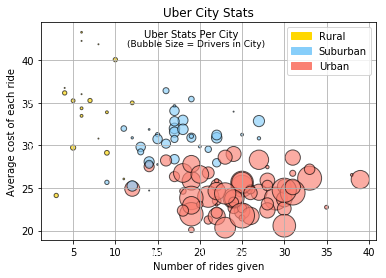

In [2]:
city_fares = data.groupby('city').fare.mean()
city_rides = data.groupby('city').ride_id.count().rename('ride_count')
city_data = city_data.join(city_rides, on='city')
city_data = city_data.join(city_fares, on='city').set_index('city').sort_index()

x_vals = city_data.ride_count
y_vals = city_data.fare
scalar = city_data.driver_count**1.75
colors = np.where(city_data.type == 'Rural', 'gold', (np.where(city_data.type == 'Suburban', 'lightskyblue', 'salmon')))
city_data.plot(kind='scatter', x='ride_count', y='fare', s=((city_data.driver_count)**1.5),
                      c=colors, alpha=.65, edgecolors='black', grid=True, title='Uber City Stats')

#since I plotted all the data at once, I had to do this patching method to make a legend
#I didn't do the subplots, but could have.  I thought it would take more lines of code to do it that way, but I guess its about the same
green = mpatches.Patch(color='gold', label='Rural')
blue = mpatches.Patch(color='lightskyblue', label='Suburban')
grey = mpatches.Patch(color='salmon', label='Urban') #salmon looked more like the color in the example than coral or lightcoral does
patches = [green, blue, grey]
plt.legend(handles=patches, loc='upper right')
plt.text(19.5, 42,"(Bubble Size = Drivers in City)", color='black', fontsize=9, horizontalalignment='center',verticalalignment='center')
plt.text(19, 43,"Uber Stats Per City", color='black', fontsize=10, horizontalalignment='center',verticalalignment='center')
plt.text(20, 17.5,"Number of Rides Given", color='white', fontsize=10, horizontalalignment='center',verticalalignment='center')
plt.text(0, 33,"Average Fare", color='white', rotation=90, fontsize=10, horizontalalignment='center',verticalalignment='center')
plt.xlabel("Number of rides given")
plt.ylabel("Average cost of each ride")
# Save Figure
plt.savefig('scatter.jpg')

## Total Fares by City Type

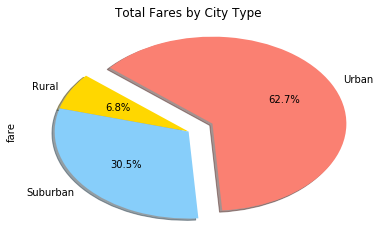

In [22]:
# Calculate Type Percents
fares = ride_data.join(city_data[['type']], on='city').groupby('type').fare.sum()
colors = ['gold', 'lightskyblue', 'salmon']
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .2)

fares.plot(kind="pie", labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140, title="Total Fares by City Type")

plt.savefig("totalfares.jpg")

## Total Rides by City Type

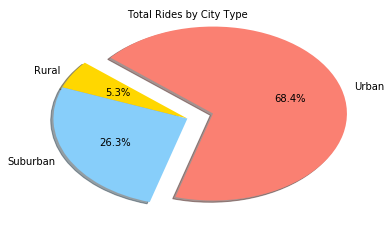

In [4]:
# Calculate Type Percents
total_rides = city_data.ride_count.sum()
rural_rides = city_data.loc[city_data['type']=='Rural', :].ride_count.sum()
sub_rides = city_data.loc[city_data['type']=='Suburban', :].ride_count.sum()
urban_rides = city_data.loc[city_data['type']=='Urban', :].ride_count.sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
rides = [rural_rides, sub_rides, urban_rides]
colors = ['gold', 'lightskyblue', 'salmon']
explode = (0,0,0.2)
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.text(0, 1.2,"Total Rides by City Type", color='black', fontsize=10, horizontalalignment='center',verticalalignment='center')
# Save Figure
plt.savefig("totalrides.jpg")

## Total Drivers by City Type

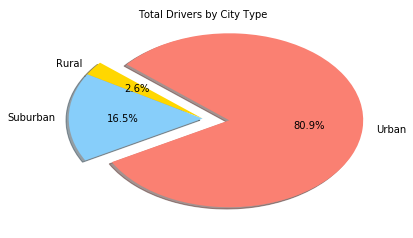

In [6]:
# Calculate Type Percents
total_drivers = city_data.driver_count.sum()
rural_drivers = city_data.loc[city_data['type']=='Rural', :].driver_count.sum()
sub_drivers= city_data.loc[city_data['type']=='Suburban', :].driver_count.sum()
urban_drivers = city_data.loc[city_data['type']=='Urban', :].driver_count.sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
drivers = [rural_drivers, sub_drivers, urban_drivers]
colors = ['gold', 'lightskyblue', 'salmon']
explode = (0,0,.2)
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.text(0, 1.2,"Total Drivers by City Type", color='black', fontsize=10, horizontalalignment='center',verticalalignment='center')
# Save Figure
plt.savefig('totaldrivers.jpg')